In [2]:
from keras.datasets import imdb

# 載入 imdb 資料(電影評論)
# num_words = 10000 意義為止載入字典範圍 0~9999 的句子
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 9s 1us/step


In [5]:
# lets take a look

print("評論: ",train_data[0])
print("正負面: ", train_labels[0]) # 1 是正面，0 是負面。

評論:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
正負面:  1


In [13]:
# 上面的評論為甚麼是數字呢?這就要去補一下 NLP 的知識了。
# 免費教學資源 : https://leemeng.tw/shortest-path-to-the-nlp-world-a-gentle-guide-of-natural-language-processing-and-deep-learning-for-everyone.html

# 驗證一下所有句子中的詞最大的對應字典是多少

the_max = max([max(seq) for seq in train_data])
print(the_max)

9999


In [16]:
# 在來看看論原文長怎樣吧

word_index = imdb.get_word_index()  # 取得字典集

word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [21]:
# 我們看到字典的 key 是文字，值是數字，這並不能幫助我們把數字解碼回原文。
# 我們要把字典反轉過來:

reverse_word_index = dict([(val, key) for (key, val) in word_index.items()])
a

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [24]:
# 將第一筆資料轉碼回原文

tar = train_data[0]

# 這邊 -3 的原因，是因為 imdb load_data() 的時候把所有數字都 +3，因為 0~2 有特殊用途，所以我們這邊需要手動 -3。

decode_review = ' '.join([reverse_word_index.get(i - 3, "") for i in tar])
decode_review

" this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the

In [28]:
# 資料預處理

# 我們對每一句話都做 Mulit_hot encoding。舉例來說，當我們字典集中有 a-z 這 26 個英文字母。
# 那我們今天有一個字母陣列 [a, c, e]，我們進行 encoding 之後會變這樣 [1, 0, 1, 0, 1, 0, 0, 0, ..., 0]
# 換句話說就是句子在字典中出現了，就標註出來。

import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    # 歷遍每一句
    for index, seq in enumerate(sequences):
        result[index, seq] = 1.
    return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("第一筆 x_train 資料: ", x_train[0])
print("x_train 的 shape: ", np.shape(x_train))
        

第一筆 x_train 資料:  [0. 1. 1. ... 0. 0. 0.]
x_train 的 shape:  (25000, 10000)


In [29]:
# 把 labels 也轉成向量

y_train = np.asarray(train_labels).astype('float32') # 向量化，轉成 1D 陣列。
y_test = np.asarray(test_labels).astype('float32') # 向量化，轉成 1D 陣列。

y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [30]:
# 建立神經網路

# 首先，我們先決定使用一個具有 relu 激勵函數的 16 神經元 Dense 層。 Dense(16, activation='relu')

# 具有 relu 的 Dense 執行以下運算 relu(dot(Weight, input) + bias)

# 擁有 16 個神經元表示權重 (Weight) 的 shape 為 (input_dimension, 16)，假如我們 input_dimension = 10000，那就是 (10000, 16)

# 我們先定義一下我們需要的層數與神經元個數 : 2個 hidden_layer，每層 16 個神經元

# 中間層使用 relu 做為激勵函數，最後一層使用 sigmoid 激勵函數輸出機率  0 ~ 1 之間的分數(值越接進1則越正向)


from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # hidden_layer
model.add(layers.Dense(16, activation='relu')) # hidden_layer
model.add(layers.Dense(1, activation='sigmoid')) # output_layer

In [31]:
# 我們要處理的問題總結起來就是一個二元分類問題，不多說，我們損失函數直接用 binary_crossentropy。

from keras import  optimizers, losses, metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),  # learning_rate 訂為 0.001
              loss=losses.binary_crossentropy,  # 損失函數
              metrics=[metrics.binary_accuracy]) # 評量函數使用 accuracy

In [32]:
# 從 x_train 資料集中拉出 10000 個樣本作驗證資料
x_val = x_train[:10000] # 前 10000 做驗證
x_train = x_train[10000:] # 10000 之後的做訓練

y_val = y_train[:10000]
y_train = y_train[10000:]

In [34]:
# 開始訓練

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 58ms/step - loss: 0.5065 - binary_accuracy: 0.7905 - val_loss: 0.3734 - val_binary_accuracy: 0.8638
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2945 - binary_accuracy: 0.9026 - val_loss: 0.3347 - val_binary_accuracy: 0.8663
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2175 - binary_accuracy: 0.9270 - val_loss: 0.2842 - val_binary_accuracy: 0.8868
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1718 - binary_accuracy: 0.9422 - val_loss: 0.2985 - val_binary_accuracy: 0.8810
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1399 - binary_accuracy: 0.9561 - val_loss: 0.3150 - val_binary_accuracy: 0.8766
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1155 - binary_accuracy: 0.9639 - val_loss: 0.3129 - val_binary_accuracy: 0.8790
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - los

In [35]:
# 準確率還不錯，我們再來看一下 fit 回傳的 history 物件
# history 有一個 history 屬性

history_dict = history.history

# keys 中包含了 4 個項目，是訓練過程中的指標。
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [36]:
# 讓我們使用 matplotlib 來觀察一下訓練過程中的報告吧

import matplotlib.pyplot as plt

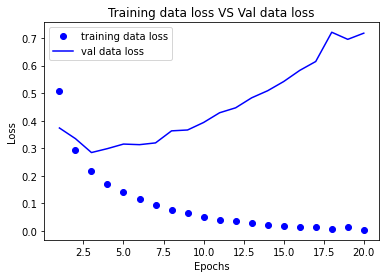

In [42]:
loss_values = history_dict['loss']  # 每次訓練的損失分數
val_loss_values = history_dict['val_loss']  # 每次驗證的損失分數

epochs = range(1, len(loss_values) + 1) # 1~20

plt.plot(epochs, loss_values, 'bo', label="training data loss")
plt.plot(epochs, val_loss_values, 'b', label="val data loss")
plt.title("Training data loss VS Val data loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend() # 顯示圖表線型名稱

plt.show()

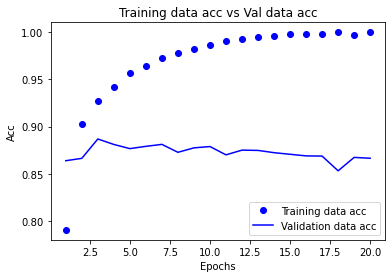

In [44]:
# 在來看看準確率

plt.clf() # 清除圖表

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label="Training data acc")
plt.plot(epochs, val_acc, 'b', label="Validation data acc")
plt.title("Training data acc vs Val data acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()

plt.show()

In [45]:
# 我們通過觀察兩張統計圖的差異，我們可以知道，我們的訓練發生了 overfitting 的狀況。
# 我們的模型對訓練資料的表現越來越好，可是驗證資料的表現越來越差
# 從統計中我們可以發現，當 epoch=3 時的表現最好，所以我們可以把 epochs 定成 4，重新訓練一次

# 我們要處理的問題總結起來就是一個二元分類問題，不多說，我們損失函數直接用 binary_crossentropy。

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # hidden_layer
model.add(layers.Dense(16, activation='relu')) # hidden_layer
model.add(layers.Dense(1, activation='sigmoid')) # output_layer

model.compile(optimizer=optimizers.RMSprop(lr=0.001),  # learning_rate 訂為 0.001
              loss=losses.binary_crossentropy,  # 損失函數
              metrics=[metrics.binary_accuracy]) # 評量函數使用 accuracy

# 開始訓練

history = model.fit(x_train,
                    y_train,
                    epochs=3, # 注意這邊，epochs 訂為 3
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/3
30/30 [==============================] - 2s 52ms/step - loss: 0.5197 - binary_accuracy: 0.7827 - val_loss: 0.4119 - val_binary_accuracy: 0.8384
Epoch 2/3
30/30 [==============================] - 1s 27ms/step - loss: 0.3108 - binary_accuracy: 0.9055 - val_loss: 0.3078 - val_binary_accuracy: 0.8863
Epoch 3/3
30/30 [==============================] - 1s 26ms/step - loss: 0.2298 - binary_accuracy: 0.9247 - val_loss: 0.2828 - val_binary_accuracy: 0.8888


In [46]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 2s 3ms/step - loss: 0.2977 - binary_accuracy: 0.8827


[0.29774731397628784, 0.8827199935913086]

In [49]:
# model對測試的準確率為 88.27%，表現還算可以。
# 如果要實際使用看看 model 的話，可以使用 predict func

model.predict(x_test)

array([[0.3301019 ],
       [0.9971303 ],
       [0.8856182 ],
       ...,
       [0.12400892],
       [0.26982838],
       [0.62851894]], dtype=float32)

In [50]:
# 數值越高代表越正面。

In [ ]:
# 重點整理:

# 二元分類問題，我們應該以 1 個神經元當作 output 並且要用 sigmoid 作為啟動函數，使輸出介於 0~1 之間。
# 使用 sigmoid 輸出 2 元分類問題時，損失函數需要用 binary_crossentropy
# 處理分類文提，rmsprop 優化器通常是不錯的選擇
# 訓練完 model 之後一定要做驗證，取找出是否出現 overfitting 的現象發生。